# ADS Homework #5: Clustering Algorithms
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, December 17, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu.

In [63]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from pylab import get_cmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from statsmodels.discrete.discrete_model import MNLogit
from sklearn.naive_bayes import GaussianNB

**Problem 1**) Explore the bias/variance trade-off that is associated with all prediction algorithms. To do so, use the randomly generated data below. Deploy the KNN algorithm with K = 3, K = 10, K = 25, and K = 49, and K = 100. Generate separate graphs for each.  

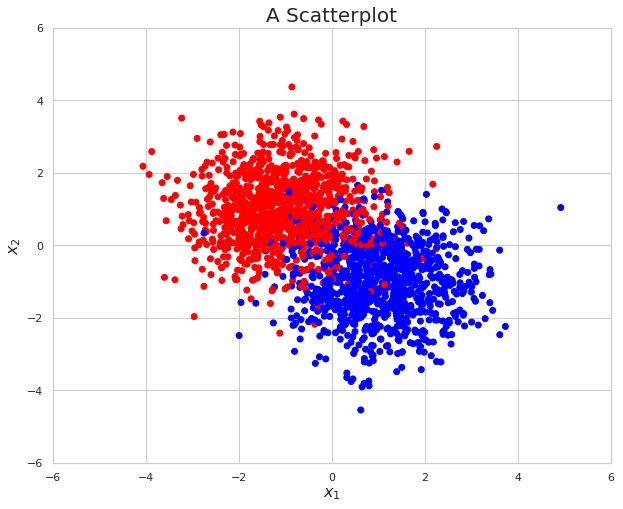

In [2]:
np.random.seed(12345)
red = np.random.multivariate_normal([-1, 1], [[1,0],[0,1]], 1000)
blue = np.random.multivariate_normal([1, -1], [[1,0],[0,1]], 1000)

plt.figure(figsize=(10,8))
colors = ['red', 'blue']
plt.scatter(red, blue, c=colors)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot', fontsize = 20)
plt.show()

In [3]:
y1 = np.zeros((len(red),), dtype=np.int) + 1
y2 = np.zeros((len(blue),), dtype=np.int) + 2
y = np.append(y1, y2, axis=0)
X = np.append(red, blue, axis=0)

1 is Red, and 2 is Blue
KNN with 3 Nearest Neighbors predicts [1]


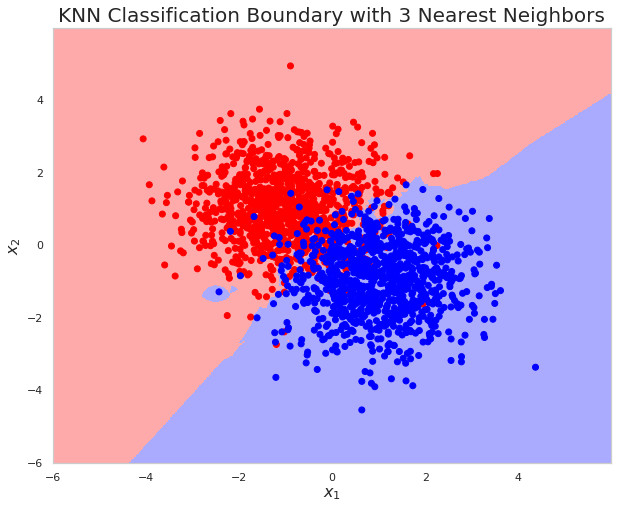

In [4]:
NN = 3
how = 'distance'
point = [[-2, 2]]
knn = neighbors.KNeighborsClassifier(NN, how)
knn.fit(X, y)
print ("1 is Red, and 2 is Blue")
print ("KNN with %i Nearest Neighbors predicts" % (NN), knn.predict(point))

background = ListedColormap(['#FFAAAA', '#AAAAFF'])
dots = ListedColormap(['#FF0000', '#0000FF'])
h = 0.02

x_min, x_max = -6, 6
y_min, y_max = -6, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=background)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=dots)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification Boundary with %i Nearest Neighbors" % (NN), fontsize = 20)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)

1 is Red, and 2 is Blue
KNN with 10 Nearest Neighbors predicts [1]


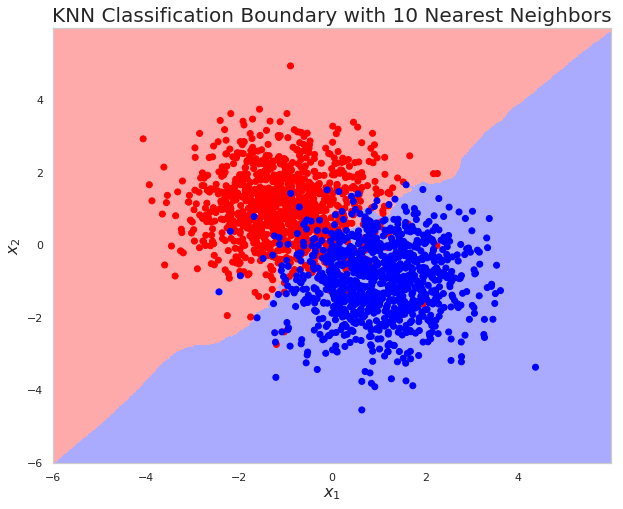

In [5]:
NN = 10
how = 'distance'
point = [[-2, 2]]
knn = neighbors.KNeighborsClassifier(NN, how)
knn.fit(X, y)
print ("1 is Red, and 2 is Blue")
print ("KNN with %i Nearest Neighbors predicts" % (NN), knn.predict(point))

background = ListedColormap(['#FFAAAA', '#AAAAFF'])
dots = ListedColormap(['#FF0000', '#0000FF'])
h = 0.02

x_min, x_max = -6, 6
y_min, y_max = -6, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=background)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=dots)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification Boundary with %i Nearest Neighbors" % (NN), fontsize = 20)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)

1 is Red, and 2 is Blue
KNN with 25 Nearest Neighbors predicts [1]


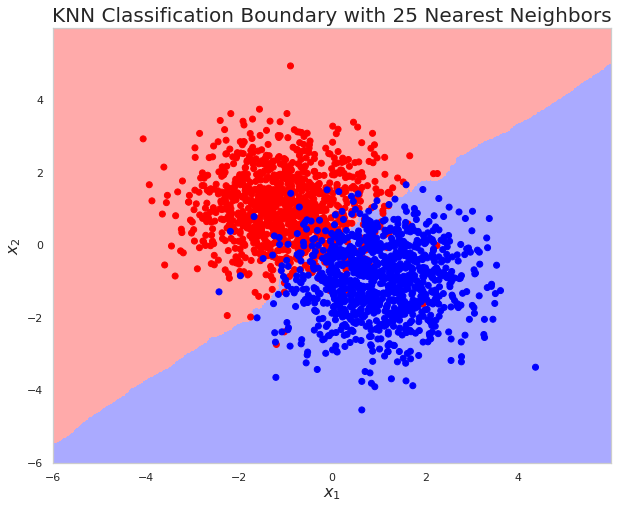

In [6]:
NN = 25
how = 'distance'
point = [[-2, 2]]
knn = neighbors.KNeighborsClassifier(NN, how)
knn.fit(X, y)
print ("1 is Red, and 2 is Blue")
print ("KNN with %i Nearest Neighbors predicts" % (NN), knn.predict(point))

background = ListedColormap(['#FFAAAA', '#AAAAFF'])
dots = ListedColormap(['#FF0000', '#0000FF'])
h = 0.02

x_min, x_max = -6, 6
y_min, y_max = -6, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=background)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=dots)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification Boundary with %i Nearest Neighbors" % (NN), fontsize = 20)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)

1 is Red, and 2 is Blue
KNN with 49 Nearest Neighbors predicts [1]


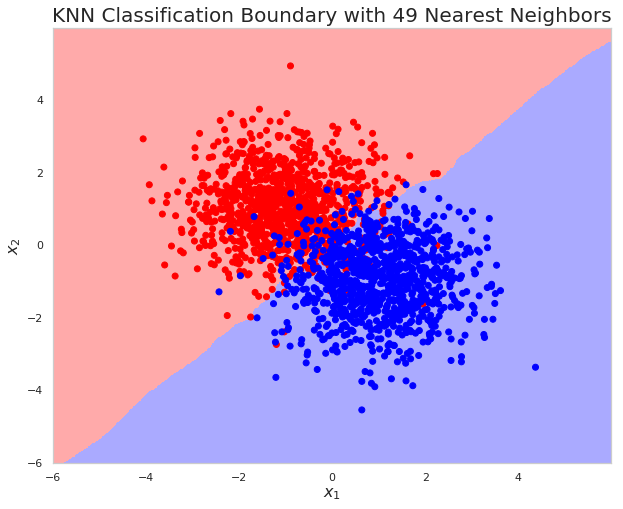

In [7]:
NN = 49
how = 'distance'
point = [[-2, 2]]
knn = neighbors.KNeighborsClassifier(NN, how)
knn.fit(X, y)
print ("1 is Red, and 2 is Blue")
print ("KNN with %i Nearest Neighbors predicts" % (NN), knn.predict(point))

background = ListedColormap(['#FFAAAA', '#AAAAFF'])
dots = ListedColormap(['#FF0000', '#0000FF'])
h = 0.02

x_min, x_max = -6, 6
y_min, y_max = -6, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=background)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=dots)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification Boundary with %i Nearest Neighbors" % (NN), fontsize = 20)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)

1 is Red, and 2 is Blue
KNN with 100 Nearest Neighbors predicts [1]


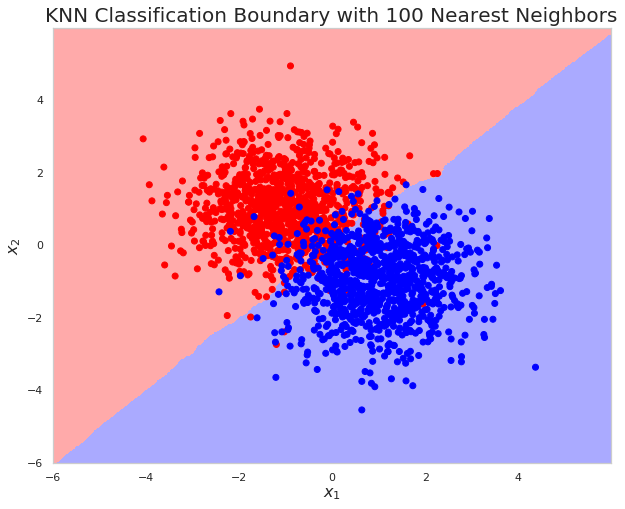

In [8]:
NN = 100
how = 'distance'
point = [[-2, 2]]
knn = neighbors.KNeighborsClassifier(NN, how)
knn.fit(X, y)
print ("1 is Red, and 2 is Blue")
print ("KNN with %i Nearest Neighbors predicts" % (NN), knn.predict(point))

background = ListedColormap(['#FFAAAA', '#AAAAFF'])
dots = ListedColormap(['#FF0000', '#0000FF'])
h = 0.02

x_min, x_max = -6, 6
y_min, y_max = -6, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=background)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=dots)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification Boundary with %i Nearest Neighbors" % (NN), fontsize = 20)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)

**Problem 2**) Read in the spam dataset, and split into training and test sets.  Increase the number of features used for analysis to the first 10 features, implement all the classifiers shown in class, namely KNN, RFF, LDA, MNL, NB, and Guessing.  Compare the accuracy and MSE of each method. (Note that MNL in this case is just the logit classifier.)

In [27]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/"
              "spambase/spambase.data")
spam = pd.read_csv(target_url, header=None, prefix="v")

spam.rename(columns={'v57':'spam'}, inplace=True)
print (spam['spam'].head())
print (spam['spam'].tail())

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, dtype: int64


In [28]:
spam.tail(10)

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v48,v49,v50,v51,v52,v53,v54,v55,v56,spam
4591,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,8,0
4592,0.00,0.0,1.25,0.0,2.50,0.00,0.0,0.0,0.0,0.0,...,0.000,0.111,0.0,0.000,0.0,0.0,1.285,4,27,0
4593,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,1.052,0.0,0.0,1.000,1,6,0
4594,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.630,0.0,0.000,0.0,0.0,1.727,5,19,0
4595,0.00,0.0,1.19,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,24,0
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [35]:
spam['Ind'] = np.zeros((len(spam),), dtype=np.int)
for i in range(len(spam)):
    if spam['spam'][i]==1: spam['Ind'][i] += 1
   


np.random.seed(12345)
spam['index'] = np.random.uniform(low = 0, high = 1, size = len(spam))
spam['test'] = pd.get_dummies(spam['index'] <= 0.3333)[1]

# We don't need the index, so drop it.
del spam['index']

# Now we can create new train and test dataframes.
# Note the format of these command lines.
# It basically resolves as create spamtest as a subset of spam when test is 1.
# Otherwise, it is train.
spamtest = spam[spam['test'] == 1]
spamtrain = spam[spam['test'] == 0]

# Confirm data has been split properly.
print(len(spamtrain))
print(len(spamtest))
print(len(spam))

3056
1545
4601


In [39]:
spamtest

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v50,v51,v52,v53,v54,v55,v56,spam,Ind,test
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.372,0.180,0.048,5.114,101,1028,1,1,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.000,0.276,0.184,0.010,9.821,485,2259,1,1,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.000,3.537,40,191,1,1,1
12,0.00,0.69,0.34,0.0,0.34,0.00,0.00,0.00,0.00,0.00,...,0.000,0.786,0.000,0.000,3.728,61,261,1,1,1
13,0.00,0.00,0.00,0.0,0.90,0.00,0.90,0.00,0.00,0.90,...,0.000,0.000,0.000,0.000,2.083,7,25,1,1,1
14,0.00,0.00,1.42,0.0,0.71,0.35,0.00,0.35,0.00,0.71,...,0.000,0.357,0.000,0.000,1.971,24,205,1,1,1
23,0.00,0.00,0.00,0.0,1.16,0.00,0.00,0.00,0.00,0.00,...,0.000,0.667,0.000,0.000,1.131,5,69,1,1,1
29,0.00,0.00,0.00,0.0,0.65,0.00,0.65,0.00,0.00,0.00,...,0.000,0.091,0.000,0.000,2.687,66,129,1,1,1
30,1.17,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.886,0.000,0.000,1.966,10,59,1,1,1
33,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.302,0.000,1.700,5,17,1,1,1


In [47]:
ytrain = spamtrain[['Ind']].as_matrix(columns=None)
ytest = spamtest[['Ind']].as_matrix(columns=None)

Xtrain = spamtrain.iloc[:, 0:56].as_matrix(columns=None)
Xtest = spamtest.iloc[:, 0:56].as_matrix(columns=None)
 #Set NN for KNN at the sqrt(4601).
 #Evaluate the prediction from KNN for the average set of features.
#NN = 68
#how = 'distance'
#point = [[spamtrain.mean()[0]], [spamtrain.mean()[1]], [spamtrain.mean()[2]], 
         #[spamtrain.mean()[3]], 
        #[spamtrain.mean()[4]], [spamtrain.mean()[5]], [spamtrain.mean()[6]], [spamtrain.mean()[7]]]
#knn = neighbors.KNeighborsClassifier(NN, how)
#knn.fit(Xtrain, ytrain)
#knn.predict(point)
#print("1 is spam, 0 is not spam")
#print("KNN with %i Nearest Neighbors predicts" % (NN), knn.predict(point))

In [67]:
Xtrain.shape

(3056, 56)

In [53]:
ypred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
KNNcm = cm
cm
MSE_KNN = mean_squared_error(ytest, ypred)
MSE_KNN

0.12427184466019417

In [54]:
ypred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
KNNcm = cm
MSE = mean_squared_error(ytest, ypred)

ACC_KNN = (cm[0][0] + cm[1][1]) / (len(ypred))


print("The Accuracy Rate is", ACC_KNN)


The Accuracy Rate is 0.87572815534


In [55]:


np.random.seed(12345)
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
RFcm = cm
MSE_RFF = mean_squared_error(ytest, ypred)
MSE_RFF

0.051779935275080909

In [56]:
ACC_RFF = (cm[0][0] + cm[1][1]) / (len(ypred))
ACC_RFF

0.94822006472491904

In [61]:
lda = LDA()
lda.fit(Xtrain, ytrain)
ypred = lda.predict(Xtest)
MSE_LDA = mean_squared_error(ytest, ypred)

cm = confusion_matrix(ytest, ypred)

ACC_LDA = (cm[0][0] + cm[1][1]) / (len(ypred))
print(MSE_LDA)
print(ACC_LDA)

0.108737864078
0.891262135922


In [78]:
endogtrain = spamtrain['Ind']
exogtrain = spamtrain.iloc[:, 0:56].as_matrix(columns=None)
exogtest = spamtest.iloc[:, 0:56].as_matrix(columns=None)
mnlogit = MNLogit(endogtrain, exogtrain).fit()
print(mnlogit.summary())
print()
pred = np.array(mnlogit.predict(exogtest))

prediction = np.zeros((len(ypred),), dtype=np.int) + 3
for i in range(len(prediction)): 
    if pred[i][0] > pred[i][1]: prediction[i] = 1
    if pred[i][1] > pred[i][0]: prediction[i] = 2
        
cm = confusion_matrix(ytest, prediction)
MSE = mean_squared_error(ytest, prediction)

ACC = (cm[0][0] + cm[1][1]) / (len(ypred))



print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

         Current function value: nan
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                    Ind   No. Observations:                 3056
Model:                        MNLogit   Df Residuals:                     3000
Method:                           MLE   Df Model:                           55
Date:                Tue, 11 Dec 2018   Pseudo R-squ.:                     nan
Time:                        19:15:48   Log-Likelihood:                    nan
converged:                      False   LL-Null:                       -2047.7
                                        LLR p-value:                       nan
     Ind=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7609      0.263     -2.890      0.004      -1.277      -0.245
x2            -0.2201      0.076     -2.899      0.004      -0.369    

In [76]:
endogtrain.shape

(4601,)

In [80]:
NN = 65
how = 'distance'
ypred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
knnACC = (cm[0][0] + cm[1][1]) / (len(ypred))
knnMSE = mean_squared_error(ytest, ypred)

rf = RandomForestClassifier(n_estimators = 20)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
rfACC = (cm[0][0] + cm[1][1]) / (len(ypred))
rfMSE = mean_squared_error(ytest, ypred)

lda = LDA()
lda.fit(Xtrain, ytrain)
ypred = lda.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
ldaACC = (cm[0][0] + cm[1][1]) / (len(ypred))
ldaMSE = mean_squared_error(ytest, ypred)

mnlogit = MNLogit(endogtrain, exogtrain).fit()
pred = np.array(mnlogit.predict(exogtest))
prediction = np.zeros((len(ypred),), dtype=np.int) + 3
for i in range(len(prediction)): 
    if pred[i][0] > pred[i][1]: prediction[i] = 1
    if pred[i][1] > pred[i][0]: prediction[i] = 2
cm = confusion_matrix(ytest, prediction)
mnlACC = (cm[0][0] + cm[1][1] +cm[2][2]) / (len(ypred))
mnlMSE = mean_squared_error(ytest, prediction)


gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
nbACC = (cm[0][0] + cm[1][1]) / (len(ypred))
nbMSE = mean_squared_error(ytest, ypred)

# What would a confusion matrix with random allocation look like?

ypred = np.random.permutation(ytest)
cm = confusion_matrix(ytest, ypred)
ranACC = (cm[0][0] + cm[1][1]) / (len(ypred))
ranMSE = mean_squared_error(ytest, ypred)

         Current function value: nan
         Iterations: 35


In [81]:
print('Accuracy of KNN, RF, LDA, MNL, NB, and Guessing')
print('%f %f %f %f %f %f' % (knnACC, rfACC, ldaACC, mnlACC, nbACC, ranACC))
print('')
print('MSE of KNN, RF, LDA, MNL, NB, and Guessing')
print('%f %f %f %f %f %f' % (knnMSE, rfMSE, ldaMSE, mnlMSE, nbMSE, ranMSE))

Accuracy of KNN, RF, LDA, MNL, NB, and Guessing
0.875728 0.941748 0.891262 0.024595 0.809709 0.552104

MSE of KNN, RF, LDA, MNL, NB, and Guessing
0.124272 0.058252 0.108738 1.128803 0.190291 0.447896
